##### Importing libraries

In [13]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-Learn libraries and others
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Filter and ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Load & Understand df_train
df = pd.read_csv("../dataset/data_after_feature_engineering.csv", index_col = 0)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Multiple_deliveries,Festival,City_type,Time_taken(min),City_code,is_weekend,month_intervals,year_quarter,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,0.0,No,Urban,24,INDO,True,middle_month,1,15.0,2
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,1.0,No,Metropolitian,33,BANG,False,end_month,1,5.0,14
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,1.0,No,Urban,26,BANG,True,middle_month,1,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,1.0,No,Metropolitian,21,COIMB,False,start_month,2,10.0,5
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,1.0,No,Metropolitian,30,CHEN,True,end_month,1,15.0,4


##### **Data Preprocessing**

##### Label Encoding

##### What does the method select_dtypes do?

https://www.w3schools.com/python/pandas/ref_df_select_dtypes.asp

In [15]:
def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(df)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Multiple_deliveries,Festival,City_type,Time_taken(min),City_code,is_weekend,month_intervals,year_quarter,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,4,0,2,3,...,0.0,0,2,24,10,True,1,1,15.0,2
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3,1,2,3,...,1.0,0,0,33,3,False,0,1,5.0,14
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2,2,0,1,...,1.0,0,2,26,3,True,1,1,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,4,3,0,0,...,1.0,0,0,21,6,False,2,2,10.0,5
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,0,0,1,3,...,1.0,0,0,30,5,True,0,1,15.0,4


In [16]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'Multiple_deliveries', 'Festival', 'City_type',
       'Time_taken(min)', 'City_code', 'is_weekend', 'month_intervals',
       'year_quarter', 'order_prepare_time', 'distance'],
      dtype='object')

**To see the column indices in RFE, FFS**

In [17]:
column_mapping = {column_name: idx for idx, column_name in enumerate(df.columns)}
column_mapping

{'Delivery_person_Age': 0,
 'Delivery_person_Ratings': 1,
 'Restaurant_latitude': 2,
 'Restaurant_longitude': 3,
 'Delivery_location_latitude': 4,
 'Delivery_location_longitude': 5,
 'Weather_conditions': 6,
 'Road_traffic_density': 7,
 'Vehicle_condition': 8,
 'Type_of_order': 9,
 'Type_of_vehicle': 10,
 'Multiple_deliveries': 11,
 'Festival': 12,
 'City_type': 13,
 'Time_taken(min)': 14,
 'City_code': 15,
 'is_weekend': 16,
 'month_intervals': 17,
 'year_quarter': 18,
 'order_prepare_time': 19,
 'distance': 20}

##### **Train Test split**

In [18]:
#Split features & label
X = df.drop('Time_taken(min)', axis=1)  # Features
y = df['Time_taken(min)']               # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36474, 20)
(36474,)
(9119, 20)
(9119,)


##### **Standardization**

In [19]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)

##### **Model Building**
##### Steps

1. Employ cross-validation & hyper parameter tuning to determine the optimal regression model.
2. Construct the food delivery prediction model using the identified best model.
3. Evaluate the model's performance on the testing data to assess its accuracy and reliability.

##### Cross Validation

**Defining a parameter grid for hyperparameter tuning** for various machine learning models. Each dictionary within the `param_grid` list represents a set of hyperparameters to be tuned for a specific model.

**Hyperparameter tuning** involves searching for the optimal combination of hyperparameters to maximize model performance. By trying different combinations of hyperparameters, we can assess how each set of parameters affects the model's accuracy.

Techniques like grid search or randomized search are used to explore the parameter grid and find the best combination of hyperparameters that maximizes the model's performance.

Once you've defined your `param_grid`, we can pass it to a grid search or randomized search algorithm along with your model and training data to perform hyperparameter tuning.

We are using **GridSearchCV** for cross validation:

Here's a brief explanation of each set of hyperparameters in your `param_grid`:

1. Default parameters: Represents the default hyperparameters for the model.
2. `max_depth`: Varies the maximum depth of the decision trees in the model.
3. `n_estimators` and `max_features`: Varies the number of estimators (trees) and the maximum number of features to consider when splitting a node in the random forest model.
4. `n_estimators` and `max_depth`: Varies the number of estimators (trees) and the maximum depth of the trees in the XGBoost model.

In [20]:
# Find the best model
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor(),         # Random Forest regressor with XGBoost (Gradient Boosting Trees)

    # optional
    # LGBMRegressor(),          # Light Gradient Boost Regressor
    # CatBoostRegressor()       # Cat Boost Regressor
]

param_grid = [
    {},
    {'max_depth': [3, 5, 7]},
    {'n_estimators': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2']},                          # to reduce training time
                                                                                                    # {'n_estimators': [100, 200, 300]}, # more training time

    {'n_estimators': [20, 25, 30], 'max_depth': [5, 7, 9]},                                         # xgb params

    # {'num_leaves': [15, 20, 5], 'max_depth': [3, 5, 8], 'learning_rate': [0.05, 0.1, 0.2]},       # 'num_leaves': [85]
    # {'n_estimators': [5, 7, 9], 'max_depth': [6, 8, 10], 'learning_rate': [0.05, 0.1, 0.2]}       # experiment with 'n_estimators': [500, 700, 900]
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()

LinearRegression:
Best parameters: {}
Best R2 score: 0.41839073516953224

DecisionTreeRegressor:
Best parameters: {'max_depth': 7}
Best R2 score: 0.7307598274847747

RandomForestRegressor:
Best parameters: {'max_features': 'auto', 'n_estimators': 7}
Best R2 score: 0.7891584634878938

XGBRegressor:
Best parameters: {'max_depth': 7, 'n_estimators': 20}
Best R2 score: 0.8196825093235572



##### **Fitting the model**

In [21]:
# Create a XGB regressor model
xgb_model = xgb.XGBRegressor(n_estimators=20,max_depth=9)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

##### **Model Evaluation**

To calculate the adjusted R-squared, you can use the following formula:

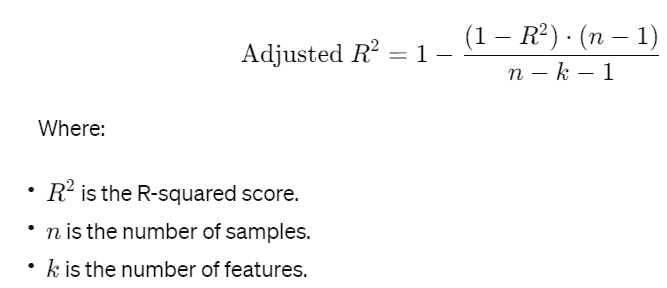

In [23]:
# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

def adjusted_r_squared(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = adjusted_r_squared(r2, len(y_test), X_test.shape[1])

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))
print("Adjusted R-squared Score:", round(adjusted_r2, 2))

Mean Absolute Error (MAE): 3.15
Mean Squared Error (MSE): 15.65
Root Mean Squared Error (RMSE): 3.96
R-squared (R2) Score: 0.82
Adjusted R-squared Score: 0.82


##### **Feature Selection of training data**

**Forward Feature Selection** is an iterative method wherein we start with the performing features against the target features. Next, we select another variable that gives the best performance in combination with the first selected variable. This process continues until the preset criterion is achieved.

https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

In [24]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(xgb.XGBRegressor(n_estimators=20,max_depth=9),
           k_features="best",
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=2)

sfs = sfs.fit(X_train ,y_train)
selected_feat_= list(sfs.k_feature_names_)
selected_feat_ = list(map(int, selected_feat_))

selected_feat_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.7s finished

[2024-06-14 23:37:18] Features: 1/20 -- score: 0.19198440188983829[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.9s finished

[2024-06-14 23:37:22] Features: 2/20 -- score: 0.34439291232674424[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.2s finished

[2024-06-14 23:37:26] Features: 3/20 -- score: 0.4610604229637437[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

[0, 1, 6, 7, 8, 10, 11, 12, 13, 18, 19]

The features selected are indexed at [0, 1, 6, 7, 8, 10, 11, 12, 13, 18, 19].

The features selected might vary a little, but the accuracy remains the same approximately.

In [27]:
# Split features and target variable

selected_columns = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
                    'Road_traffic_density', 'Vehicle_condition', 'Type_of_vehicle', 'Multiple_deliveries', 'Festival', 'City_type',
                    'month_intervals', 'year_quarter'
                    ]
X_train = df[selected_columns]         # Features
y = df['Time_taken(min)']              # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()                    # Create a StandardScaler object
scaler.fit(X_train)                          # Fit the scaler on the training data
X_train = scaler.transform(X_train)          # Perform standardization on the training data
X_test = scaler.transform(X_test)            # Perform standardization on the testing data


# Fit XGBRegressor model with selected features
model = xgb.XGBRegressor(n_estimators=20, max_depth=9)  # Initialize XGBRegressor model
model.fit(X_train, y_train)


# Make predictions with selected features and seeing if accuracy improved or not of the model
xgb_pred = model.predict(X_test)


def adjusted_r_squared(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Evaluate the model
mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred)
adjusted_r2 = adjusted_r_squared(r2, len(y_test), X_test.shape[1])

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))
print("Adjusted R-squared Score:", round(adjusted_r2, 2))

Mean Absolute Error (MAE): 3.15
Mean Squared Error (MSE): 15.65
Root Mean Squared Error (RMSE): 3.96
R-squared (R2) Score: 0.82
Adjusted R-squared Score: 0.82


**Recursive Feature Elimination** is a feature selection method to identify a dataset’s key features. The process involves developing a model with the remaining features after repeatedly removing the least significant parts until the desired number of features is obtained.

https://www.analyticsvidhya.com/blog/2023/05/recursive-feature-elimination/#:~:text=Recursive%20Feature%20Elimination%20offers%20a,feature's%20impact%20on%20model%20performance.

https://medium.com/@evertongomede/recursive-feature-elimination-a-powerful-technique-for-feature-selection-in-machine-learning-89b3c2f3c26a

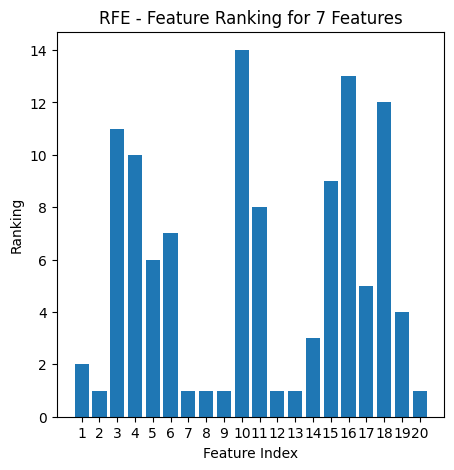

Selected 7 Features: Index(['Delivery_person_Ratings', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Multiple_deliveries', 'Festival', 'distance'],
      dtype='object')
Accuracy on the Test Set: 0.7210639025335176


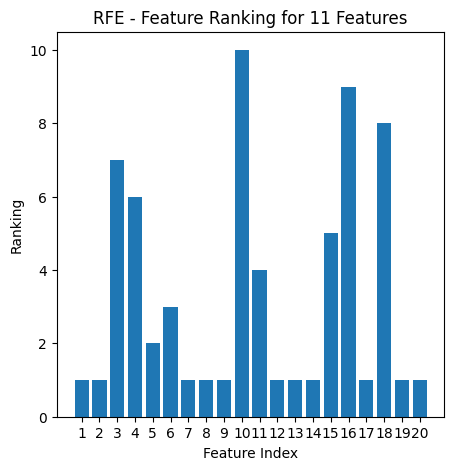

Selected 11 Features: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Multiple_deliveries',
       'Festival', 'City_type', 'month_intervals', 'order_prepare_time',
       'distance'],
      dtype='object')
Accuracy on the Test Set: 0.8213239013706876


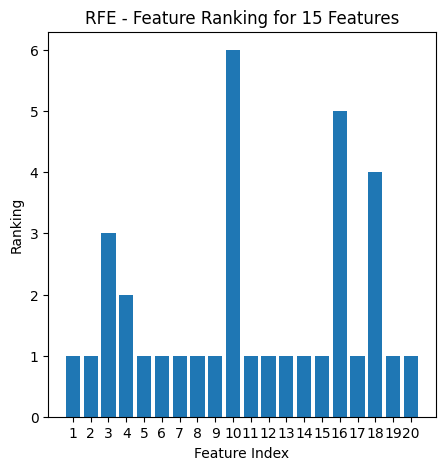

Selected 15 Features: Index(['Delivery_person_Age', 'Delivery_person_Ratings',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_vehicle', 'Multiple_deliveries', 'Festival', 'City_type',
       'City_code', 'month_intervals', 'order_prepare_time', 'distance'],
      dtype='object')
Accuracy on the Test Set: 0.8202401658802085


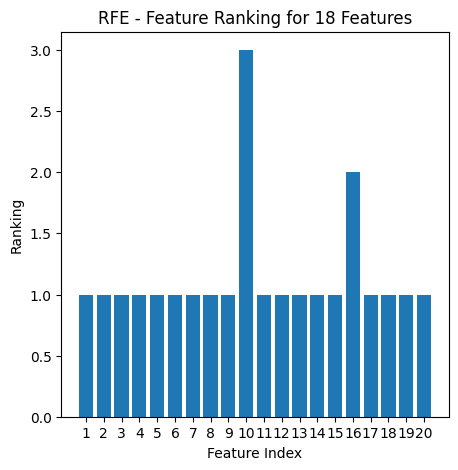

Selected 18 Features: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_vehicle',
       'Multiple_deliveries', 'Festival', 'City_type', 'City_code',
       'month_intervals', 'year_quarter', 'order_prepare_time', 'distance'],
      dtype='object')
Accuracy on the Test Set: 0.8205224589604125


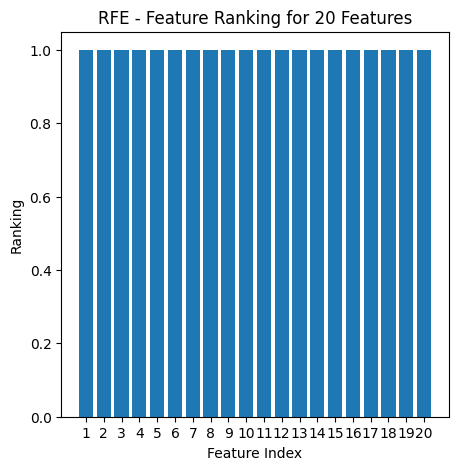

Selected 20 Features: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'Multiple_deliveries', 'Festival', 'City_type',
       'City_code', 'is_weekend', 'month_intervals', 'year_quarter',
       'order_prepare_time', 'distance'],
      dtype='object')
Accuracy on the Test Set: 0.8214984160305443


In [28]:
from sklearn.feature_selection import RFE

# Split features and target variable
X = df.drop('Time_taken(min)', axis=1)  # Features
y = df['Time_taken(min)']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()                    # Create a StandardScaler object
scaler.fit(X_train)                          # Fit the scaler on the training data
X_train_scaled = scaler.transform(X_train)   # Perform standardization on the training data
X_test_scaled = scaler.transform(X_test)     # Perform standardization on the testing data

# Initialize XGBRegressor model as the base model
xgb_model = xgb.XGBRegressor(n_estimators=20, max_depth=9)

# Define the number of features to select
num_features_list = [7, 11, 15, 18, 20]

feature_names = X.columns  # Get the feature names from the DataFrame

for num_features in num_features_list:

    # Initialize RFE with the model and the number of features to select
    rfe = RFE(estimator=xgb_model, n_features_to_select=num_features)

    # Fit RFE to the training data
    rfe.fit(X_train_scaled, y_train)

    # Get the ranking of each feature
    feature_ranking = rfe.ranking_

    # Get the indices of the selected features
    selected_features_indices = np.where(feature_ranking == 1)[0]

    # Map the selected indices back to the feature names
    selected_feature_names = feature_names[selected_features_indices]

    # Visualize the feature ranking
    plt.figure(figsize=(5, 5))
    plt.title(f"RFE - Feature Ranking for {num_features} Features")
    plt.xlabel("Feature Index")
    plt.ylabel("Ranking")
    plt.xticks(range(len(feature_ranking)), np.arange(1, len(feature_ranking) + 1))
    plt.bar(range(len(feature_ranking)), feature_ranking)
    plt.show()

    # Print the selected features
    print(f"Selected {num_features} Features:", selected_feature_names)

    # Train the final model using the selected features
    xgb_model.fit(X_train_scaled[:, selected_features_indices], y_train)

    # Evaluate the model on the test set
    accuracy = xgb_model.score(X_test_scaled[:, selected_features_indices], y_test)
    print("Accuracy on the Test Set:", accuracy)

**After 11 features being selected, it is almost giving same accuracy of the xgboost model.**

['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries',
'Festival', 'City', 'City_code', 'order_prepare_time', 'distance'] are the most contributing features.


The selected features for predicting food delivery time each have unique impacts on delivery efficiency and timing. Here's a brief explanation for each:

1. **Delivery_person_Age**: Older delivery personnel might have more experience navigating through the city, potentially affecting delivery times positively or negatively depending on various factors including physical fitness and familiarity with technology.

2. **Delivery_person_Ratings**: Higher ratings could indicate more efficient and timely deliveries, as these ratings often reflect customer satisfaction with the delivery speed and service quality.

3. **Weather_conditions**: Adverse weather conditions, such as rain or snow, can slow down delivery times due to safety concerns and reduced visibility or mobility.

4. **Road_traffic_density**: High traffic density can lead to delays in delivery times due to congestion and slower movement through the city.

5. **Vehicle_condition**: A well-maintained vehicle is less likely to encounter mechanical issues, ensuring smoother and potentially faster deliveries.

6. **Multiple_deliveries**: Delivering multiple orders in one trip can affect delivery times due to the additional stops required, which can either optimize the route efficiency or cause delays depending on the planning.

7. **Festival**: Festivals and public holidays can lead to increased traffic and order volume, potentially slowing down deliveries due to higher demand and road closures or restrictions.

8. **City**: It is to represent the population density type of the region, classified as metropolitan, urban and rural etc. Varying infrastructure, traffic patterns, and distances between restaurants and delivery locations, all of which can significantly impact delivery times.

9. **City_code**: City codes to represent various cities of India.

10. **Order_prepare_time**: The time taken to prepare an order before it's ready for delivery directly affects the total delivery time, with longer preparation times leading to later deliveries.

11. **Distance**: The distance between the restaurant and the delivery location is a direct factor affecting delivery time, with longer distances generally leading to longer delivery times.

Understanding these factors can help in optimizing delivery processes and improving customer satisfaction by potentially reducing delivery times and enhancing the overall efficiency of the service.

For different sets of the number of selected features, the accuracy does not improve above 0.82. It is almost constant in both the feature selection techniques.

So, **XGB Regressor** with `n_estimators` = 20, `max_depth` = 9 is the **best model**.

##### Conclusion

The food delivery prediction model was developed using XGBoost, achieving an impressive **R2 score** of **0.82**.

**An R2 score of 0.82 implies that the model can explain approximately 82% of the variance in the food delivery time based model.**

Moving forward, potential enhancements include identifying the best features, conducting additional feature engineering, and exploring other optimization techniques to further improve the model's performance and accuracy. These steps will contribute to fine-tuning the model and unlocking its full potential in predicting food delivery timings accurately.